## Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
n_neighbors = 15

In [3]:
# import dataset
#iris = datasets.load_iris()
iris = datasets.load_iris(as_frame=True)
df = iris.frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# we only take the first two features.
X ,x_test ,y ,y_test = train_test_split( df.iloc[:,:2] ,df["target"])
# X =df.iloc[:,:2]
# y = df["target"]

In [7]:
X.head(2)

,sepal length (cm),sepal width (cm)
133,6.3,2.8
48,5.3,3.7


In [8]:
y.head(2)

133    2
48     0
Name: target, dtype: int32

In [9]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

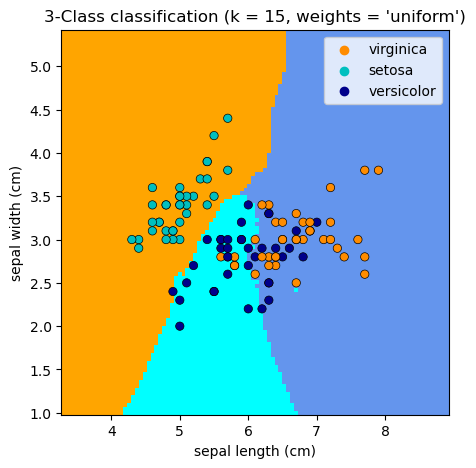

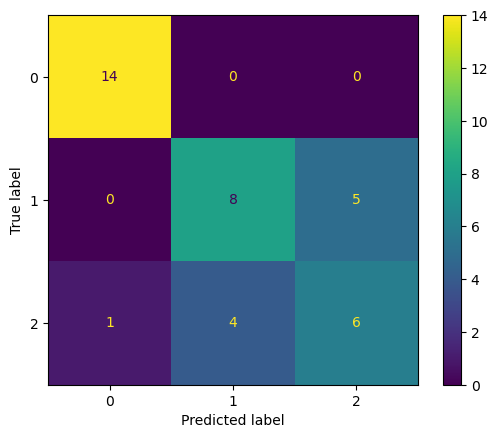

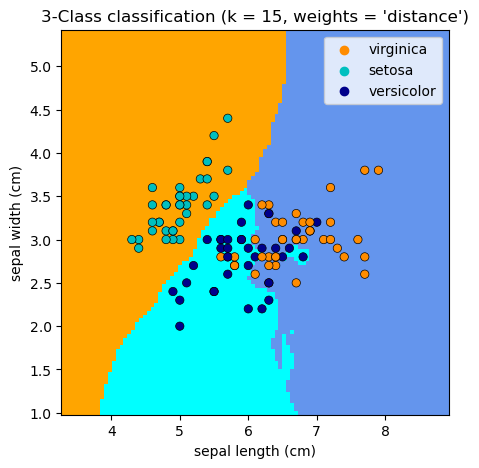

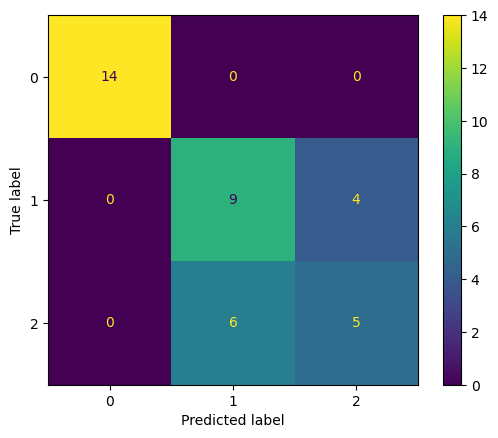

In [24]:
for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    _, ax = plt.subplots(figsize=(5,5))
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )
    # Plot also the training points
    sns.scatterplot(
        x=X.iloc[:,0],
        y=X.iloc[:,1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    preds = clf.predict(x_test)
    
    cfm =confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=clf.classes_)
    disp.plot()
    plt.show()